<a href="https://colab.research.google.com/github/Quy-Thanh/Girvan-Newman/blob/main/Girvan_Newman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Tải dữ liệu lên

In [ ]:
  from google.colab import files

  files.upload()

{}

#Gọi các thư viện và các hàm cần thiết

In [ ]:
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

#Đọc dữ liệu

In [ ]:
# Khởi tạo đồ thị có hướng
G = nx.DiGraph()

# Đọc dữ liệu từ tệp txt
with open('Amazon0302.txt', 'r') as file:
    for line in file:
        # Bỏ qua các dòng bắt đầu bằng "#"
        if line.startswith("#"):
            continue

        # Tách dòng thành các đỉnh (FromNodeId và ToNodeId)
        from_node, to_node = map(int, line.strip().split())

        # Thêm cạnh vào đồ thị
        G.add_edge(from_node, to_node)

# Kiểm tra số đỉnh và số cạnh trong đồ thị
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Số đỉnh: {num_nodes}")
print(f"Số cạnh: {num_edges}")


FileNotFoundError: ignored

#Thực hiện thuật toán Girvan Newman trên đồ thị G

In [ ]:
# Thực hiện thuật toán Girvan-Newman
comp = girvan_newman(G)

# Lấy cộng đồng kết quả (có thể lặp qua để chọn K cộng đồng)
communities = tuple(sorted(c) for c in next(comp))

NameError: ignored

#In ra các cộng đồng là kết quả của thuật toán trên

In [ ]:
# In các cộng đồng ra
print("Các cộng đồng:")
for i, community in enumerate(communities):
    print(f"Cộng đồng {i + 1}: {community}")

Các cộng đồng:
Cộng đồng 1: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 68, 69, 70, 71, 72, 73, 74, 75, 77, 137, 138, 139, 140, 141, 164, 260, 261, 262, 290]
Cộng đồng 2: [3, 63, 64, 65, 66, 67]


#Biểu diễn cơ cấu cộng đồng dưới dạng biểu đồ tròn

In [ ]:
# Biểu diễn kết quả bằng biểu đồ tròn
labels = [f'Cộng đồng {i + 1}' for i in range(len(communities))]
sizes = [len(community) for community in communities]

# Tạo biểu đồ
fig = go.Figure()

# Thêm dữ liệu vào biểu đồ
fig.add_trace(go.Pie(labels=labels, values=sizes, hole=.3))

# Cập nhật bố cục biểu đồ
fig.update_layout(title='Biểu đồ tròn phân tích cộng đồng',
                   font_size=12)

# Hiển thị biểu đồ
fig.show()

NameError: ignored

#Biểu diễn các cộng đồng dưới dạng biểu đồ mạng tương tác

In [ ]:
# Tạo đồ thị Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    edge_x.append(edge[0])
    edge_y.append(edge[1])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    node_x.append(node)
    node_y.append(node)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    marker=dict(symbol='circle', size=10, color='#666'),
    hoverinfo='text',
    text=list(G.nodes()))

layout = go.Layout(
    title='Interactive Graph',
    hovermode='closest'
)

fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Hiển thị đồ thị
fig.show()

In [ ]:
# Tạo biểu đồ mạng với Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text = []  # Danh sách chứa nội dung để hiển thị khi hover
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(str(node))  # Chuyển đỉnh thành chuỗi để hiển thị

node_trace = go.Scatter(
    x=node_x, y=node_y,
    text=node_text,  # Sử dụng node_text để hiển thị nội dung khi hover
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(thickness=15, title='Node Connections'),
        line_width=2))

node_trace.marker.color = 2 * len(G.edges)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0,l=0,r=0,t=0),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

fig.show()

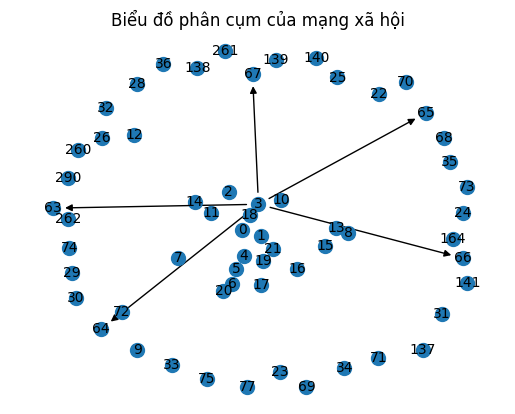

In [ ]:
# Tạo biểu đồ phân cụm
pos = nx.spring_layout(G)  # Sắp xếp lại vị trí các đỉnh trong biểu đồ

# Vẽ các đỉnh và cạnh
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_size=100, label=f'Cluster {i + 1}')
    nx.draw_networkx_labels(G, pos, labels={node: node for node in community}, font_size=10)
    if i > 0:
        edges_in_community = G.subgraph(community).edges()
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_community, width=1)

plt.title("Biểu đồ phân cụm của mạng xã hội")
plt.axis('off')
plt.show()